In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)



print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()

si-bol DataFrame shape: (44371, 23)
si-env DataFrame shape: (99485, 16)
si-veic DataFrame shape: (78867, 11)
si-log DataFrame shape: (59955, 16)


,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,local_sinalizado,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,data_hora_boletim_x,numero_envolvido,condutor,codigo_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro,data_boletim,numero_municipio,nome_municipio,sequencia_logradouros,numero_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradoro_anterior,Numero_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,numero_imovel,numero_imovel_proximo
0,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,1,SIM,1,NAO FATAL,M,SIM,NÃO INFORMADO,49,21/12/1963,C,"VEIC. MOTOR. P/ TRANSP. DE CARGA, C/ PESO MAX....",0,0,AUTOMOVEL,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
1,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,2,NÃO,1,NAO FATAL,F,NÃO INFORMADO,NÃO INFORMADO,46,06/07/1966,N,NAO INFORMADO ...,0,0,,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
2,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
3,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
4,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,24,23/03/1990,AB,HABILITADO NAS CATEGORIAS A e B ...,0,0,MOTOCICLETA,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0


In [147]:
columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,90,31/12/2012 21:51,H02002,SIM,NAO FATAL,M,49,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
1,90,31/12/2012 21:51,H02002,NÃO,NAO FATAL,F,46,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
2,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...
3,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...
4,132,31/12/2014 22:30,H08002,SIM,NAO FATAL,M,24,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...


In [148]:
#binning hour of day and age
itemsetDF = joined_df

itemsetDF['data hora_boletim'] = pd.to_datetime(itemsetDF['data hora_boletim'], format='%d/%m/%Y %H:%M')
itemsetDF['hour'] = itemsetDF['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


itemsetDF['morning'] = itemsetDF['hour'].apply(lambda x: True if x in morning_hours else False)
itemsetDF['afternoon'] = itemsetDF['hour'].apply(lambda x: True if x in afternoon_hours else False)
itemsetDF['night'] = itemsetDF['hour'].apply(lambda x: True if x in night_hours else False)

itemsetDF.drop(columns=['hour','data hora_boletim'], inplace=True)

In [149]:
#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

itemsetDF['Idade'] =itemsetDF['Idade'].astype('int')
itemsetDF['children'] = itemsetDF['Idade'].apply(lambda x: True if x in children else False)
itemsetDF['young_adult'] = itemsetDF['Idade'].apply(lambda x: True if x in young_adult else False)
itemsetDF['middle_aged'] = itemsetDF['Idade'].apply(lambda x: True if x in middle_aged else False)
itemsetDF['old_aged'] = itemsetDF['Idade'].apply(lambda x: True if x in old_aged else False)

itemsetDF.drop(columns=['Idade'], inplace=True)
itemsetDF.head()



,numero_boletim,tipo_acidente,condutor,desc_severidade,sexo,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged
0,90,H02002,SIM,NAO FATAL,M,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
1,90,H02002,NÃO,NAO FATAL,F,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
2,132,H08002,SIM,SEM FERIMENTOS,M,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
3,132,H08002,SIM,SEM FERIMENTOS,M,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
4,132,H08002,SIM,NAO FATAL,M,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,True,False,False


In [150]:
#prepping "descricao_veiculo" for one hot encoding

#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    itemsetDF['descricao_especie'] = itemsetDF['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(itemsetDF['descricao_especie'])
true_counts = vehicles_one_hot.sum()
print(true_counts)
itemsetDF.drop(columns=['descricao_especie'],inplace=True)

AUTOMOVEL                   91339
BICICLETA                    2748
CAMINHAO                    11157
MOTOCICLETA                 68769
ONIBUS                      18764
OUTROS TIPOS DE VEICULOS     3813
dtype: int64


In [151]:
#prepping "descricao_severidade"
itemsetDF['desc_severidade'] = itemsetDF['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x))
desc_severidade_one_hot = pd.get_dummies(itemsetDF['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
itemsetDF.drop(columns=['desc_severidade'],inplace=True)
print(true_counts)

fatalidade:FATAL                 823
fatalidade:NAO FATAL          103480
fatalidade:NAO INFORMADO       11651
fatalidade:SEM FERIMENTOS      80641
dtype: int64


In [152]:
#prepping "descricao_situação"
itemsetDF['descricao_situacao'] = itemsetDF['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
itemsetDF['descricao_situacao'] = itemsetDF['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(itemsetDF['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
descricao_situacao_one_hot.head()
print(true_counts)
itemsetDF.drop(columns=['descricao_situacao'],inplace=True)

EM MOVIMENTO               177435
MOVIMENTO NAO INFORMADO      5516
PARADO                      13639
dtype: int64


In [153]:
#prepping "condutor"
itemsetDF['condutor'] = itemsetDF['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(itemsetDF['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
itemsetDF.drop(columns=['condutor'],inplace=True)
print(true_counts)

condutor:NÃO               34254
condutor:NÃO INFORMADO       244
condutor:SIM              162097
dtype: int64


In [154]:
#prepping "tipo_logradouo"
to_be_replace =["TRV","TUN","VDP","VDT","VIA"
                ,"BEC","ELP","EST","NI","ALA"]
for r in to_be_replace:
    itemsetDF['tipo_logradouro'] = itemsetDF['tipo_logradouro'].str.strip().replace(r,"OUTROS_LOCAIS")
logradouro_one_hot = pd.get_dummies(itemsetDF['tipo_logradouro'])
true_counts = logradouro_one_hot.sum()
logradouro_one_hot.head()
# itemsetDF.drop(columns=['tipo_logradouro'],inplace=True)
print(true_counts)

AVE              87675
OUTROS_LOCAIS     2536
PCA               2064
ROD              14637
RUA              89533
dtype: int64


In [155]:
#prepping "sexo"
itemsetDF['sexo'] = itemsetDF['sexo'].str.strip().replace("0","sexo nao informado")
sexo_one_hot = pd.get_dummies(itemsetDF['sexo'])
true_counts = sexo_one_hot.sum()
sexo_one_hot.head()
print(true_counts)
itemsetDF.drop(columns="sexo",inplace=True)

F                      43226
M                     142391
sexo nao informado     10978
dtype: int64


In [156]:
#encoding "tipo de acidente"
tipo_acidente_one_hot = pd.get_dummies(itemsetDF['tipo_acidente'])
true_counts = tipo_acidente_one_hot.sum()
tipo_acidente_one_hot.head()

print(true_counts)
itemsetDF.drop(columns="tipo_acidente",inplace=True)

H01002    97329
H02002     5154
H03002      940
H04000     7638
H05002       97
H06001      524
H06002    17766
H07002      182
H08002    32017
H09002    32097
H99002     2851
dtype: int64


In [157]:
itemsetDF.drop(columns=["numero_boletim","categoria_habilitacao","tipo_logradouro",'descricao_tipo_socorro'],inplace=True)
concat_dfs= pd.concat([itemsetDF.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True),
                        logradouro_one_hot.reset_index(drop=True),
                         sexo_one_hot.reset_index(drop=True),
                         tipo_acidente_one_hot.reset_index(drop=True),
                         desc_severidade_one_hot.reset_index(drop=True  )],axis=1)

concat_dfs = concat_dfs.drop(columns=['nome_bairro','condutor:NÃO INFORMADO','MOVIMENTO NAO INFORMADO','OUTROS TIPOS DE VEICULOS','OUTROS_LOCAIS','fatalidade:NAO INFORMADO  ','sexo nao informado'])

In [158]:
concat_dfs.columns

Index(['morning', 'afternoon', 'night', 'children', 'young_adult',
       'middle_aged', 'old_aged', 'condutor:NÃO', 'condutor:SIM',
       'EM MOVIMENTO', 'PARADO', 'AUTOMOVEL', 'BICICLETA', 'CAMINHAO',
       'MOTOCICLETA', 'ONIBUS', 'AVE', 'PCA', 'ROD', 'RUA', 'F', 'M',
       ' H01002', ' H02002', ' H03002', ' H04000', ' H05002', ' H06001',
       ' H06002', ' H07002', ' H08002', ' H09002', ' H99002',
       'fatalidade:FATAL          ', 'fatalidade:NAO FATAL      ',
       'fatalidade:SEM FERIMENTOS '],
      dtype='object')

In [159]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth,association_rules

In [175]:
FP_itemsets = fpgrowth(concat_dfs, min_support=0.05, use_colnames=True)
FPrules = association_rules(FP_itemsets,metric="lift", min_threshold=1)
FPrules = FPrules[(FPrules['lift'] > 1.5)]
FPrules = FPrules[(FPrules['confidence'] > 0.6)]
FPrules = FPrules[(FPrules['conviction'] > 2)]
FPrules.sort_values(by='lift',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PARADO),( H08002),0.069376,0.162858,0.052921,0.762813,4.683922,0.041623,3.529454,0.845136
1,"(fatalidade:NAO FATAL , F, EM MOVIMENTO)",(condutor:NÃO),0.127053,0.174236,0.090974,0.716030,4.109533,0.068837,2.907927,0.866792
2,"(fatalidade:NAO FATAL , F)",(condutor:NÃO),0.142130,0.174236,0.101432,0.713657,4.095912,0.076668,2.883825,0.881082
3,"(fatalidade:NAO FATAL , F)","(condutor:NÃO, EM MOVIMENTO)",0.142130,0.158229,0.090974,0.640076,4.045254,0.068485,2.338746,0.877518
4,"(condutor:SIM, old_aged, H01002)","(EM MOVIMENTO, fatalidade:SEM FERIMENTOS )",0.092596,0.364668,0.066207,0.715008,1.960706,0.032440,2.229294,0.539980
...,...,...,...,...,...,...,...,...,...,...
51,"(condutor:SIM, old_aged, EM MOVIMENTO, AUTOMOVEL)",(fatalidade:SEM FERIMENTOS ),0.073644,0.410188,0.052870,0.717917,1.750212,0.022662,2.090914,0.462717
52,"(old_aged, M, H01002)","(condutor:SIM, fatalidade:SEM FERIMENTOS )",0.078985,0.406419,0.055968,0.708591,1.743497,0.023867,2.036933,0.463011
53,"(old_aged, M, EM MOVIMENTO, H01002)","(condutor:SIM, fatalidade:SEM FERIMENTOS )",0.076726,0.406419,0.054213,0.706577,1.738541,0.023030,2.022949,0.460107
54,"(M, H01002, old_aged)",(fatalidade:SEM FERIMENTOS ),0.078985,0.410188,0.056212,0.711682,1.735013,0.023813,2.045699,0.459966


In [161]:

def PlotSupportFP():
    vec = []
    x = 0.5
    x_values = []
    while x > 0.05:
        x_values.append(x)
        FP_itemsets = fpgrowth(concat_dfs, min_support=x, use_colnames=True)
        vec.append(len(FP_itemsets))
        x -= 0.05
    
    plt.scatter(x_values,vec,color = 'black',zorder = 2)
    plt.plot(x_values,vec, color = 'blue',zorder=1)
    plt.ylabel('Number of Itemsets')
    plt.xlabel('Minimun Support Value')
    plt.show()

# def PlotSupportApriori():
#     vec = []
#     x = 0.5
#     x_values = []
#     while x > 0.25:
#         x_values.append(x)
#         FP_itemsets = apriori(concat_dfs, min_support=x, use_colnames=True)
#         vec.append(len(FP_itemsets))
#         x -= 0.025
    
#     plt.plot(x_values,vec, color = 'blue')

#     plt.ylabel('Number of Itemsets')
#     plt.xlabel('Minimun Support Value')
#     plt.show()

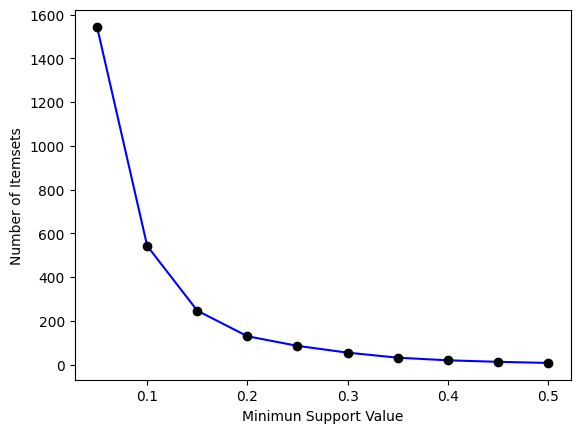

In [162]:
PlotSupportFP()

In [177]:
FPrules.sort_values(by='confidence',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(condutor:NÃO, F, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.093161,0.526361,0.090974,0.976522,1.855231,0.041937,20.173704,0.508341
1,"(condutor:NÃO, F)",(fatalidade:NAO FATAL ),0.103909,0.526361,0.101432,0.976160,1.854544,0.046738,19.867539,0.514216
2,"(condutor:NÃO, afternoon, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.054264,0.526361,0.052519,0.967848,1.838752,0.023957,14.731130,0.482326
3,"(condutor:NÃO, afternoon)",(fatalidade:NAO FATAL ),0.060200,0.526361,0.058257,0.967723,1.838514,0.026570,14.674120,0.485297
4,"(young_adult, condutor:NÃO)",(fatalidade:NAO FATAL ),0.059279,0.526361,0.057336,0.967222,1.837562,0.026134,14.449700,0.484523
5,"(young_adult, condutor:NÃO, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.054081,0.526361,0.052285,0.966798,1.836758,0.023819,14.265515,0.481608
6,"(AVE, condutor:NÃO)",(fatalidade:NAO FATAL ),0.078227,0.526361,0.075317,0.962806,1.829174,0.034142,12.734422,0.491775
7,"(AVE, condutor:NÃO, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.069798,0.526361,0.067199,0.962761,1.829087,0.030460,12.718728,0.487291
8,"(RUA, condutor:NÃO, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.073155,0.526361,0.070414,0.962523,1.828635,0.031908,12.637981,0.488910
9,"(RUA, condutor:NÃO)",(fatalidade:NAO FATAL ),0.078791,0.526361,0.075826,0.962363,1.828331,0.034353,12.584328,0.491803


In [176]:
pd.options.display.max_rows = 60
FPrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3335,"(condutor:SIM, old_aged, AUTOMOVEL)",(fatalidade:SEM FERIMENTOS ),0.086386,0.410188,0.062285,0.721015,1.757766,0.026851,2.114135,0.471858
3376,"(condutor:SIM, old_aged, M, AUTOMOVEL)",(fatalidade:SEM FERIMENTOS ),0.069519,0.410188,0.050566,0.727373,1.773264,0.022050,2.163434,0.468648
3405,"(condutor:SIM, old_aged, EM MOVIMENTO, AUTOMOVEL)",(fatalidade:SEM FERIMENTOS ),0.073644,0.410188,0.052870,0.717917,1.750212,0.022662,2.090914,0.462717
3500,"(condutor:SIM, old_aged, RUA)",(fatalidade:SEM FERIMENTOS ),0.079498,0.410188,0.058704,0.738435,1.800233,0.026095,2.254933,0.482907
3528,"(condutor:SIM, old_aged, RUA, EM MOVIMENTO)",(fatalidade:SEM FERIMENTOS ),0.072728,0.410188,0.053887,0.740943,1.806347,0.024055,2.276762,0.481409
3578,"(condutor:SIM, old_aged)",(fatalidade:SEM FERIMENTOS ),0.172883,0.410188,0.126860,0.733788,1.788906,0.055945,2.215574,0.533176
3595,"(condutor:SIM, M, old_aged)",(fatalidade:SEM FERIMENTOS ),0.145319,0.410188,0.106412,0.732262,1.785185,0.046803,2.202945,0.514618
3621,"(condutor:SIM, old_aged, M, EM MOVIMENTO)",(fatalidade:SEM FERIMENTOS ),0.129444,0.410188,0.094545,0.730391,1.780624,0.041448,2.187658,0.503585
3648,"(condutor:SIM, old_aged, EM MOVIMENTO)",(fatalidade:SEM FERIMENTOS ),0.153926,0.410188,0.112867,0.733254,1.787603,0.049728,2.211136,0.520748
3752,"(condutor:SIM, old_aged, H01002)",(fatalidade:SEM FERIMENTOS ),0.092596,0.410188,0.068338,0.738025,1.799233,0.030356,2.251401,0.489537


In [178]:
FPrules.sort_values(by='leverage',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(fatalidade:NAO FATAL , F)",(condutor:NÃO),0.142130,0.174236,0.101432,0.713657,4.095912,0.076668,2.883825,0.881082
1,(condutor:NÃO),(fatalidade:NAO FATAL ),0.174236,0.526361,0.167502,0.961348,1.826402,0.075790,12.253792,0.547948
2,"(fatalidade:NAO FATAL , F, EM MOVIMENTO)",(condutor:NÃO),0.127053,0.174236,0.090974,0.716030,4.109533,0.068837,2.907927,0.866792
3,"(condutor:NÃO, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.158229,0.526361,0.152079,0.961134,1.825997,0.068794,12.186500,0.537384
4,"(fatalidade:NAO FATAL , F)","(condutor:NÃO, EM MOVIMENTO)",0.142130,0.158229,0.090974,0.640076,4.045254,0.068485,2.338746,0.877518
5,(condutor:NÃO),"(fatalidade:NAO FATAL , EM MOVIMENTO)",0.174236,0.480577,0.152079,0.872832,1.816218,0.068345,4.084555,0.544230
6,"(condutor:SIM, old_aged)",(fatalidade:SEM FERIMENTOS ),0.172883,0.410188,0.126860,0.733788,1.788906,0.055945,2.215574,0.533176
7,"(condutor:SIM, old_aged, EM MOVIMENTO)",(fatalidade:SEM FERIMENTOS ),0.153926,0.410188,0.112867,0.733254,1.787603,0.049728,2.211136,0.520748
8,"(condutor:SIM, M, old_aged)",(fatalidade:SEM FERIMENTOS ),0.145319,0.410188,0.106412,0.732262,1.785185,0.046803,2.202945,0.514618
9,"(condutor:NÃO, F)",(fatalidade:NAO FATAL ),0.103909,0.526361,0.101432,0.976160,1.854544,0.046738,19.867539,0.514216


In [186]:
aprioriItemsets = apriori(concat_dfs, min_support=0.1, use_colnames=True)
rules = association_rules(aprioriItemsets,metric="lift", min_threshold=1)
rules = rules[(rules['lift'] > 1.5)]
rules = rules[(rules['confidence'] > 0.6)]
rules = rules[(rules['conviction'] > 2)]
rules.sort_values(by='lift',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(fatalidade:NAO FATAL , F)",(condutor:NÃO),0.142130,0.174236,0.101432,0.713657,4.095912,0.076668,2.883825,0.881082
1,"(condutor:NÃO, F)",(fatalidade:NAO FATAL ),0.103909,0.526361,0.101432,0.976160,1.854544,0.046738,19.867539,0.514216
2,(condutor:NÃO),(fatalidade:NAO FATAL ),0.174236,0.526361,0.167502,0.961348,1.826402,0.075790,12.253792,0.547948
3,"(condutor:NÃO, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.158229,0.526361,0.152079,0.961134,1.825997,0.068794,12.186500,0.537384
4,(condutor:NÃO),"(fatalidade:NAO FATAL , EM MOVIMENTO)",0.174236,0.480577,0.152079,0.872832,1.816218,0.068345,4.084555,0.544230
5,"(condutor:SIM, old_aged)",(fatalidade:SEM FERIMENTOS ),0.172883,0.410188,0.126860,0.733788,1.788906,0.055945,2.215574,0.533176
6,"(condutor:SIM, old_aged, EM MOVIMENTO)",(fatalidade:SEM FERIMENTOS ),0.153926,0.410188,0.112867,0.733254,1.787603,0.049728,2.211136,0.520748
7,"(condutor:SIM, M, old_aged)",(fatalidade:SEM FERIMENTOS ),0.145319,0.410188,0.106412,0.732262,1.785185,0.046803,2.202945,0.514618


In [167]:
aprioriItemsets

,support,itemsets
0,0.311742,(morning)
1,0.359796,(afternoon)
2,0.328462,(night)
3,0.346947,(young_adult)
4,0.301513,(middle_aged)
...,...,...
538,0.105593,"(condutor:SIM, EM MOVIMENTO, RUA, fatalidade:N..."
539,0.106218,"(condutor:SIM, EM MOVIMENTO, RUA, fatalidade:S..."
540,0.177644,"(condutor:SIM, EM MOVIMENTO, M, fatalidade:NAO..."
541,0.160477,"(condutor:SIM, EM MOVIMENTO, fatalidade:SEM FE..."


In [168]:
rules.sort_values(by='confidence',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(condutor:NÃO, F)",(fatalidade:NAO FATAL ),0.103909,0.526361,0.101432,0.976160,1.854544,0.046738,19.867539,0.514216
1,(condutor:NÃO),(fatalidade:NAO FATAL ),0.174236,0.526361,0.167502,0.961348,1.826402,0.075790,12.253792,0.547948
2,"(condutor:NÃO, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.158229,0.526361,0.152079,0.961134,1.825997,0.068794,12.186500,0.537384
3,(condutor:NÃO),"(fatalidade:NAO FATAL , EM MOVIMENTO)",0.174236,0.480577,0.152079,0.872832,1.816218,0.068345,4.084555,0.544230
4,"(condutor:SIM, old_aged)",(fatalidade:SEM FERIMENTOS ),0.172883,0.410188,0.126860,0.733788,1.788906,0.055945,2.215574,0.533176
...,...,...,...,...,...,...,...,...,...,...
71,"(M, fatalidade:NAO FATAL )","(young_adult, H01002, EM MOVIMENTO)",0.379740,0.181882,0.103762,0.273244,1.502316,0.034694,1.125712,0.539066
72,"(condutor:SIM, fatalidade:SEM FERIMENTOS )","(M, old_aged)",0.406419,0.161494,0.106412,0.261827,1.621277,0.040777,1.135921,0.645578
73,(fatalidade:SEM FERIMENTOS ),"(M, old_aged)",0.410188,0.161494,0.106956,0.260748,1.614596,0.040713,1.134263,0.645376
74,(fatalidade:SEM FERIMENTOS ),"(condutor:SIM, M, old_aged)",0.410188,0.145319,0.106412,0.259421,1.785185,0.046803,1.154072,0.745719


In [169]:
rules.sort_values(by='leverage',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(condutor:NÃO),"(fatalidade:NAO FATAL , F)",0.174236,0.142130,0.101432,0.582151,4.095912,0.076668,2.053063,0.915340
1,"(fatalidade:NAO FATAL , F)",(condutor:NÃO),0.142130,0.174236,0.101432,0.713657,4.095912,0.076668,2.883825,0.881082
2,(fatalidade:NAO FATAL ),(condutor:NÃO),0.526361,0.174236,0.167502,0.318226,1.826402,0.075790,1.211198,0.955318
3,(condutor:NÃO),(fatalidade:NAO FATAL ),0.174236,0.526361,0.167502,0.961348,1.826402,0.075790,12.253792,0.547948
4,"(condutor:NÃO, EM MOVIMENTO)",(fatalidade:NAO FATAL ),0.158229,0.526361,0.152079,0.961134,1.825997,0.068794,12.186500,0.537384
...,...,...,...,...,...,...,...,...,...,...
71,"(MOTOCICLETA, fatalidade:NAO FATAL )",(young_adult),0.195966,0.346947,0.103482,0.528059,1.522017,0.035492,1.383760,0.426571
72,(young_adult),"(MOTOCICLETA, fatalidade:NAO FATAL , EM M...",0.346947,0.190656,0.100938,0.290934,1.525962,0.034791,1.141422,0.527791
73,"(MOTOCICLETA, fatalidade:NAO FATAL , EM M...",(young_adult),0.190656,0.346947,0.100938,0.529427,1.525962,0.034791,1.387784,0.425870
74,"(young_adult, H01002, EM MOVIMENTO)","(M, fatalidade:NAO FATAL )",0.181882,0.379740,0.103762,0.570490,1.502316,0.034694,1.444110,0.408695


In [170]:
aprioriItemsets.sort_values(by='support',ascending=False)

,support,itemsets
8,0.902541,(EM MOVIMENTO)
7,0.824522,(condutor:SIM)
84,0.743213,"(condutor:SIM, EM MOVIMENTO)"
14,0.724286,(M)
90,0.655693,"(condutor:SIM, M)"
...,...,...
77,0.100847,"(RUA, old_aged)"
531,0.100786,"(MOTOCICLETA, condutor:SIM, EM MOVIMENTO, fata..."
425,0.100689,"(condutor:SIM, M, middle_aged, AVE)"
465,0.100343,"(condutor:SIM, H01002, fatalidade:SEM FERIMEN..."


In [180]:
FPmaxItemsets = fpmax(concat_dfs, min_support=0.05, use_colnames=True)

In [181]:
FPmaxItemsets

,support,itemsets
0,0.056751,(CAMINHAO)
1,0.052921,"(PARADO, H08002)"
2,0.057636,"(condutor:SIM, PARADO)"
3,0.050912,"(condutor:SIM, M, ROD)"
4,0.053806,"(condutor:SIM, EM MOVIMENTO, ROD)"
...,...,...
267,0.063577,"(EM MOVIMENTO, RUA, AUTOMOVEL, fatalidade:NAO ..."
268,0.057565,"(condutor:SIM, EM MOVIMENTO, RUA, AUTOMOVEL, M..."
269,0.082082,"(condutor:SIM, EM MOVIMENTO, RUA, AUTOMOVEL, M..."
270,0.092673,"(condutor:SIM, EM MOVIMENTO, RUA, M, fatalidad..."
